In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from numpy import argmax
import numpy as np

In [2]:
data=pd.read_csv("/content/mobile_price_classification.csv")

In [3]:
data.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data['price_range'].unique()
"""
From this, we found that there are four price ranges in the dataset,
so an MLP model would be a good fit for this data."""

' \nFrom this, we found that there are four price ranges in the dataset, \nso an MLP model would be a good fit for this data.'

In [5]:
x,y=data.values[:,:-1],data.values[:,-1]

In [6]:
x=x.astype('float32')

In [7]:
data.shape

(2000, 21)

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [9]:
x_train.shape

(1600, 20)

In [10]:
x_test.shape

(400, 20)

In [11]:
#Number of feature for the first layers is
n_feature=x_train.shape[1]

In [12]:
#define a ANN model for MLP

model=Sequential()
model.add(Dense(16,activation='relu',input_shape=(n_feature,)))
model.add(Dense(8,activation="relu"))
model.add(Dense(6,activation="relu"))
model.add(Dense(4,activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=100,batch_size=16)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2767 - loss: 241.2213
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2766 - loss: 33.5671
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3291 - loss: 5.5103
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3347 - loss: 3.5948
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3324 - loss: 2.2926
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3855 - loss: 1.8838
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4451 - loss: 1.5587
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4577 - loss: 1.4179
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4828 - loss: 1.3116
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5390 - loss: 1.1044
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5404 - loss: 1.0912
Epoch 12/100
100/100 ━━━━━━━━━━━━━━━━━

In [14]:
# After 100 epochs we got a accuracy of 75%

In [16]:
loss,acc=model.evaluate(x_test,y_test,verbose=1)
print("Test Accuracy = %.3f"% acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7951 - loss: 0.4858  
Test Accuracy = 0.810


In [ ]:
# After training the model we got a accuracy of 81 % on test data

In [17]:
x_test[13]

array([7.070e+02, 0.000e+00, 5.000e-01, 0.000e+00, 0.000e+00, 1.000e+00,
       1.600e+01, 1.000e-01, 1.940e+02, 2.000e+00, 0.000e+00, 1.027e+03,
       1.508e+03, 1.853e+03, 1.700e+01, 1.400e+01, 1.200e+01, 1.000e+00,
       1.000e+00, 1.000e+00], dtype=float32)

In [20]:
y_test[13]

np.float64(1.0)

In [21]:
test_row=[7.070e+02, 0.000e+00, 5.000e-01, 0.000e+00, 0.000e+00, 1.000e+00,
       1.600e+01, 1.000e-01, 1.940e+02, 2.000e+00, 0.000e+00, 1.027e+03,
       1.508e+03, 1.853e+03, 1.700e+01, 1.400e+01, 1.200e+01, 1.000e+00,
       1.000e+00, 1.000e+00]

In [38]:
yhat=model.predict(np.array([test_row]))
predict_class=np.argmax(yhat)
confi=np.max(yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


In [51]:
print(f"Actual prediction of the test data is {y_test[13]}. \nThe model prediction is {predict_class} with the confidence {confi}")

Actual prediction of the test data is 1.0. 
The model prediction is 1 with the confidence 0.7646046280860901


## HyperParameter Tuning

In [52]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │            28 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,664 (6.50 KB)

 Trainable params: 554 (2.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,110 (4.34 KB)

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [58]:
#standardize the feature value

scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [59]:
x_train.shape

(1600, 20)

In [55]:
model=Sequential()
model.add(Dense(16,activation='relu',input_shape=(n_feature,)))
model.add(Dense(8,activation="relu"))
model.add(Dense(6,activation="relu"))
model.add(Dense(4,activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [61]:
history=model.fit(x_train,
                  y_train,
                  validation_split=0.2,
                  epochs=50,
                  batch_size=8,
                  verbose=1)

Epoch 1/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2528 - loss: 1.4712 - val_accuracy: 0.3344 - val_loss: 1.3549
Epoch 2/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3723 - loss: 1.3256 - val_accuracy: 0.4094 - val_loss: 1.2650
Epoch 3/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4089 - loss: 1.2429 - val_accuracy: 0.4781 - val_loss: 1.1234
Epoch 4/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4807 - loss: 1.1087 - val_accuracy: 0.5500 - val_loss: 0.9988
Epoch 5/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5713 - loss: 0.9955 - val_accuracy: 0.6406 - val_loss: 0.8761
Epoch 6/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6770 - loss: 0.8432 - val_accuracy: 0.7469 - val_loss: 0.7175
Epoch 7/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7854 - loss: 0.6662 - val_accuracy: 0.8281 - val_loss: 0.5565
Epoch 8/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8825 - loss: 0.4780 - val_accuracy: 0.

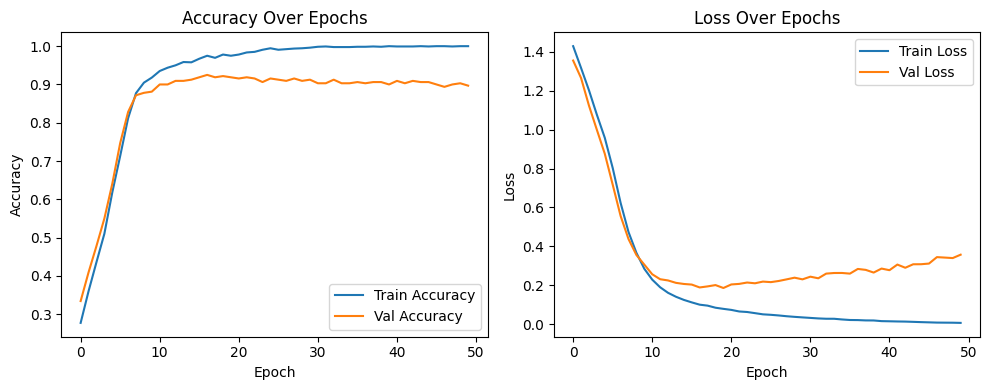

In [63]:
plt.figure(figsize=(10, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [65]:
loss,acc=model.evaluate(x_test,y_test)
print("Test Accuracy = %.3f"% acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9005 - loss: 0.3350 
Test Accuracy = 0.913


In [69]:
def train_model(learning_rate=0.013,batch_size=8,num_epochs=50,optimizer='adam'):
  model=Sequential()
  model.add(Dense(16,activation="relu",input_shape=(n_feature,)))
  model.add(Dense(8,activation="relu"))
  model.add(Dense(6,activation="relu"))
  model.add(Dense(4,activation="softmax"))

  optimizer=Adam(learning_rate=learning_rate)
  model.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
  histroy=model.fit(x_train,y_train,validation_split=0.2,epochs=num_epochs,batch_size=batch_size,verbose=0)
  return histroy

In [70]:
learning_rate=[0.0001,0.001,0.01,0.1]

In [71]:
histories={}

In [72]:
for lr in learning_rate:
  histories[lr]=train_model(learning_rate=lr)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [77]:
def plot(to_plot=learning_rate,name="learning_rate"):
  plt.figure(figsize=(10,6))

  plt.subplot(1,2,1)
  for i in to_plot:
    plt.plot(histories[i].history['val_accuracy'],label=f"{name}={i}")
  plt.title("Validation Accuracy per epochs")
  plt.xlabel("epochs")
  plt.ylabel("accuracy")
  plt.legend()

  plt.subplot(1,2,2)
  for i in to_plot:
    plt.plot(histories[i].history['val_accuracy'],label=f"{name}={i}")
  plt.title("validation Loss per Epoch")
  plt.xlabel("Epochs")
  plt.ylabel("loss")
  plt.legend()

  plt.tight_layout()
  plt.show()

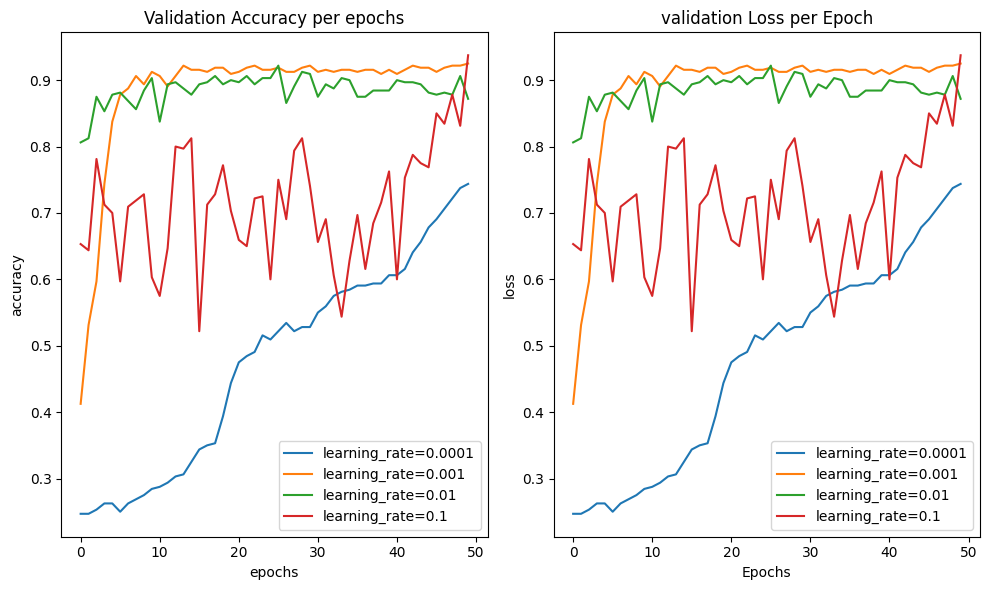

In [78]:
plot(to_plot=learning_rate)

In [ ]:
# this plot shows us that learning_rate= 0.001 is fit

In [79]:
batch_sizes=[4,8,16,32]
histories={}

In [83]:
for batch in batch_sizes:
  histories[batch]=train_model(batch_size=batch)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


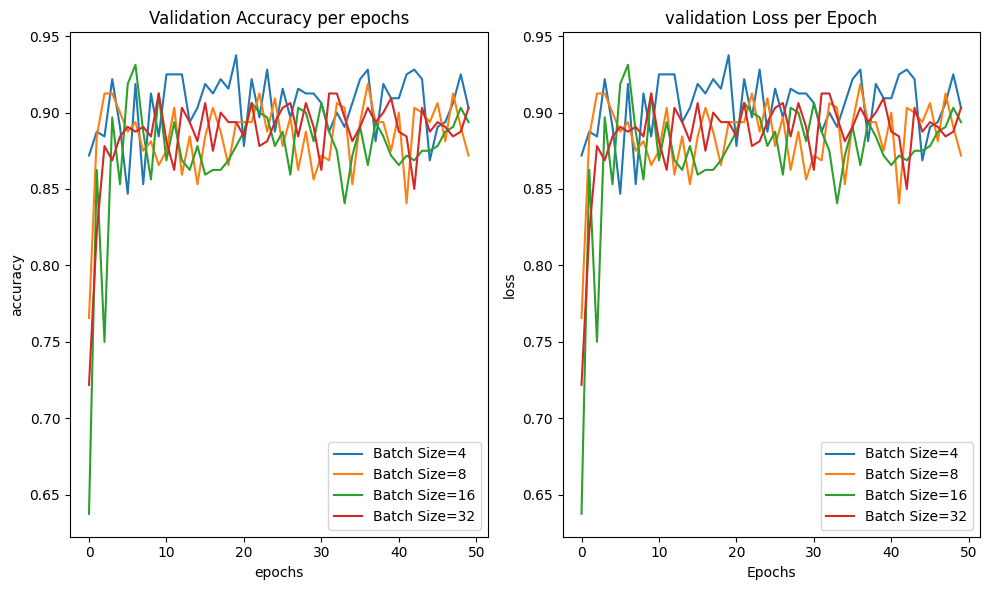

In [84]:
plot(to_plot=batch_sizes,name="Batch Size")

### the optimized batch size is 8


In [85]:
epoch_values = [10, 30, 50, 100]
histories = {}

In [87]:
for i in epoch_values:
  histories[i]=train_model(num_epochs=i)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


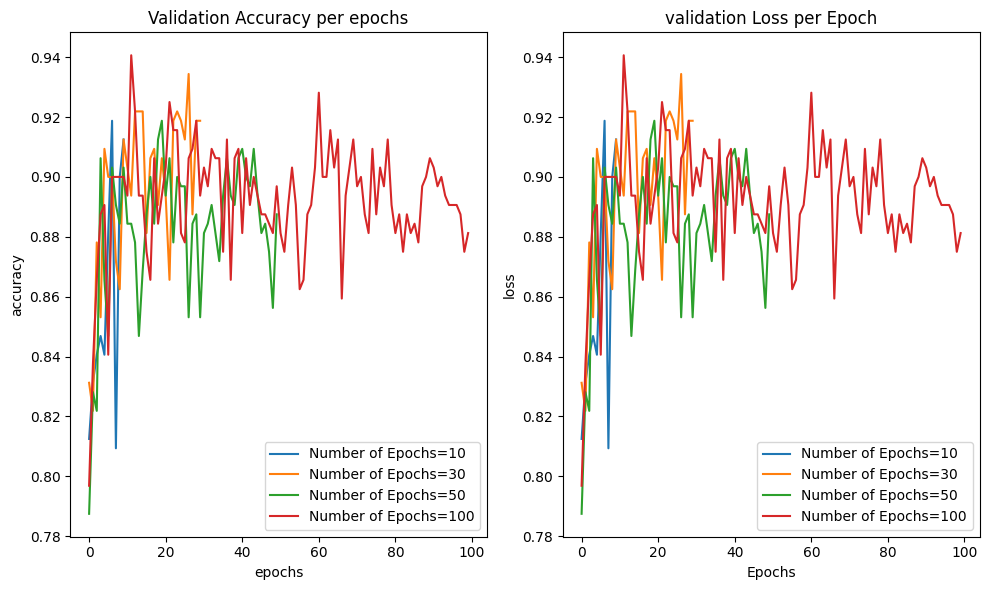

In [88]:
plot(to_plot=epoch_values,name="Number of Epochs")

In [ ]:
# 30 epochs is the right one

In [89]:
optimizer={
    "Adam": Adam(learning_rate=0.001),
    "SGD":SGD(learning_rate=0.001),
    "RMSprop":RMSprop(learning_rate=0.001)
}

In [90]:
for i in optimizer:
  histories[i]=train_model(optimizer=i)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


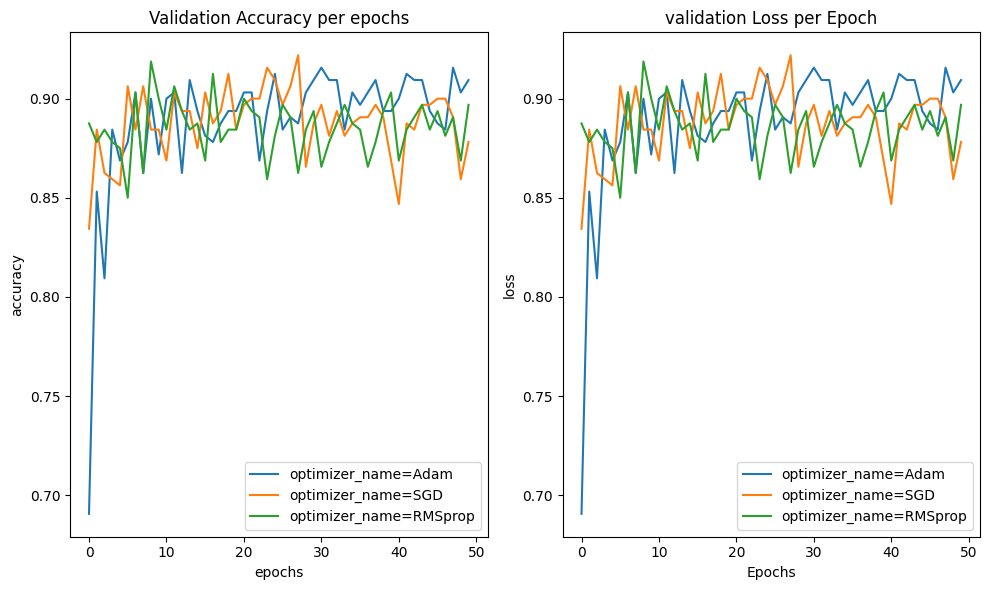

In [91]:
plot(to_plot=optimizer,name="optimizer_name")

In [92]:
# Adam optimizer is best for this dataset

In [95]:
history=train_model(learning_rate=0.001,batch_size=8,num_epochs=30,optimizer="adam")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


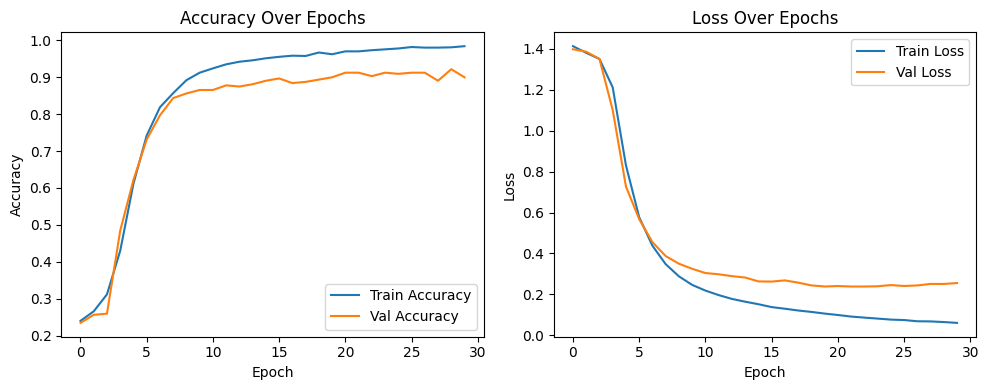

In [96]:
plt.figure(figsize=(10, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()